<a href="https://colab.research.google.com/github/Prayuktii/OS-Final-Project/blob/main/Merged_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import time
import matplotlib.pyplot as plt

In [2]:
# Check available devices (including GPUs)
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


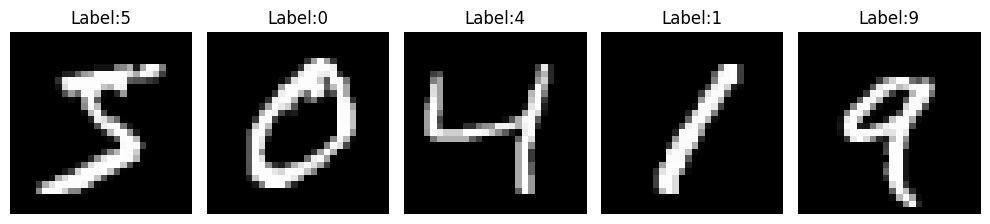

In [4]:
# Display sample images from the dataset
num_samples_to_display = 5
plt.figure(figsize=(10, 4))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label:{train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# Define a more complex model with deeper layers and dropout
def create_complex_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [6]:
# Define and train models on CPU and GPU
def train_model_on_device(model, train_images, train_labels, test_images, test_labels, device):
    optimizer = tf.keras.optimizers.Adam()

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Using {device} for computations.")
    start_time = time.time()
    with tf.device(device):
        history = model.fit(train_images, train_labels,
                            epochs=10, batch_size=128,
                            validation_data=(test_images, test_labels))
    end_time = time.time()

    return history, end_time - start_time

In [7]:
# GPU Training
with tf.device('/GPU:0'):
    gpu_model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    gpu_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    print("Using GPU for computations.")
    start_time_gpu = time.time()
    gpu_history = gpu_model.fit(train_images, train_labels,
                                epochs=10, batch_size=128,
                                validation_data=(test_images, test_labels))
    end_time_gpu = time.time()

    gpu_time = end_time_gpu - start_time_gpu

Using GPU for computations.
Epoch 1/10
469/469 [==============================] - 9s 4ms/step - loss: 0.3650 - accuracy: 0.8982 - val_loss: 0.1996 - val_accuracy: 0.9426
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1658 - accuracy: 0.9525 - val_loss: 0.1389 - val_accuracy: 0.9588
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1192 - accuracy: 0.9656 - val_loss: 0.1136 - val_accuracy: 0.9649
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0914 - accuracy: 0.9736 - val_loss: 0.0970 - val_accuracy: 0.9722
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0743 - accuracy: 0.9783 - val_loss: 0.0869 - val_accuracy: 0.9736
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0609 - accuracy: 0.9827 - val_loss: 0.0821 - val_accuracy: 0.9755
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0514 - accuracy: 0.9852 - val_loss: 0.0788 -

In [8]:
# CPU Training
with tf.device('/CPU:0'):
    cpu_model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    cpu_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    start_time_cpu = time.time()
    cpu_history = cpu_model.fit(train_images, train_labels,
                                epochs=10, batch_size=128,
                                validation_data=(test_images, test_labels))
    end_time_cpu = time.time()

    cpu_time = end_time_cpu - start_time_cpu

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3599 - accuracy: 0.9008 - val_loss: 0.1897 - val_accuracy: 0.9460
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1644 - accuracy: 0.9530 - val_loss: 0.1335 - val_accuracy: 0.9604
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1197 - accuracy: 0.9659 - val_loss: 0.1059 - val_accuracy: 0.9677
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0920 - accuracy: 0.9738 - val_loss: 0.0951 - val_accuracy: 0.9702
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0740 - accuracy: 0.9791 - val_loss: 0.0873 - val_accuracy: 0.9725
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0609 - accuracy: 0.9827 - val_loss: 0.0789 - val_accuracy: 0.9758
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9855 - val_loss: 0.0764 - val_accuracy: 0.9746
Epoch 

In [9]:
# Plot training time comparison
x = ['CPU Time', 'GPU Time']
y = [cpu_time, gpu_time]

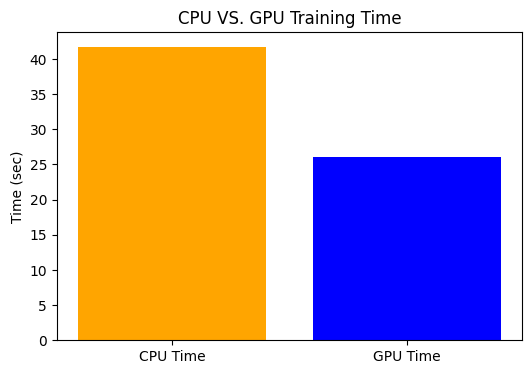

In [10]:
plt.figure(figsize=(6, 4))
plt.bar(x, y, color=['orange', 'blue'])
plt.ylabel("Time (sec)")
plt.title("CPU VS. GPU Training Time")
plt.show()

In [11]:
# Visualize training history (accuracy and loss)
def plot_training_history(history, title):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + ' - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' - Loss')

    plt.tight_layout()
    plt.show()

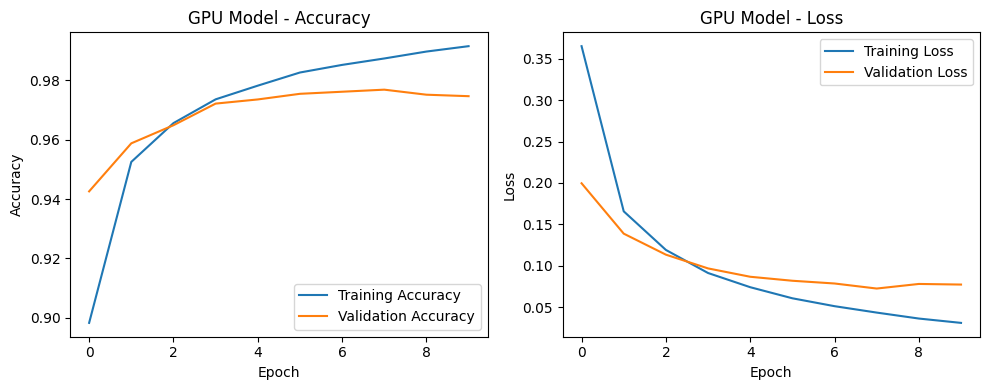

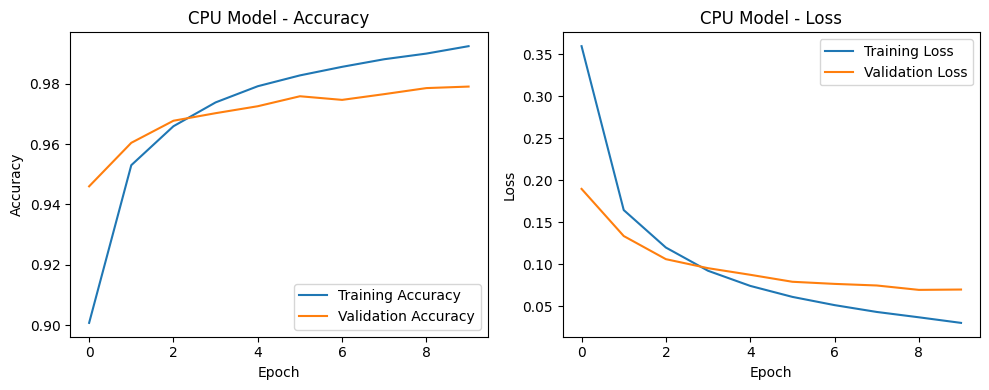

In [12]:
plot_training_history(gpu_history, 'GPU Model')
plot_training_history(cpu_history, 'CPU Model')